In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from scipy.stats import zscore
import warnings as w
w.filterwarnings('ignore')

In [ ]:
from google.colab import files

In [ ]:
upload = files.upload()

Saving diagnosed_cbc_data_v4.csv to diagnosed_cbc_data_v4.csv


In [ ]:
cbc_df = pd.read_csv('diagnosed_cbc_data_v4.csv')

In [ ]:
cbc_df

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.00,43.200,50.100,4.30000,5.00000,2.77,7.3,24.2000,87.7,26.3,30.1,189.0,12.500000,0.17000,Normocytic hypochromic anemia
1,10.00,42.400,52.300,4.20000,5.30000,2.84,7.3,25.0000,88.2,25.7,20.2,180.0,12.500000,0.16000,Normocytic hypochromic anemia
2,7.20,30.700,60.700,2.20000,4.40000,3.97,9.0,30.5000,77.0,22.6,29.5,148.0,14.300000,0.14000,Iron deficiency anemia
3,6.00,30.200,63.500,1.80000,3.80000,4.22,3.8,32.8000,77.9,23.2,29.8,143.0,11.300000,0.12000,Iron deficiency anemia
4,4.20,39.100,53.700,1.60000,2.30000,3.93,0.4,316.0000,80.6,23.9,29.7,236.0,12.800000,0.22000,Normocytic hypochromic anemia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028,Healthy
1277,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028,Healthy
1278,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028,Healthy
1279,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028,Healthy


### About Dataset

CBC data labeled with the diagnosis of Anemia type, The data collected among several CBCs data and diagnosed manually

### Data dictionary:
HGB: The amount of hemoglobin in the blood, crucial for oxygen transport.

PlT: The number of platelets in the blood, involved in blood clotting.

WBC: The count of white blood cells, vital for immune response.

RBC: The count of red blood cells, responsible for oxygen transport.

MCV (Mean Corpuscular Volume): Average volume of a single red blood cell.

MCH (Mean Corpuscular Hemoglobin): Average amount of hemoglobin per red blood cell.

MCHC (Mean Corpuscular Hemoglobin Concentration): Average concentration of hemoglobin in red blood cells.

PDW: a measurement of the variability in platelet size distribution in the blood

PCT: A procalcitonin test can help your health care provider diagnose if you have sepsis from a bacterial infection or if you have a high risk of developing sepsis

LYMp: Percentage of lymphocytes

NEUTp: Percentage of neutrophils

LYMn: Absolute lymphocyte count

NEUTn: Absolute neutrophil count

Diagnosis: Anemia type based on the CBC parameters

In [ ]:
cbc_df.shape

(1281, 15)

In [ ]:
cbc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1281 entries, 0 to 1280
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WBC        1281 non-null   float64
 1   LYMp       1281 non-null   float64
 2   NEUTp      1281 non-null   float64
 3   LYMn       1281 non-null   float64
 4   NEUTn      1281 non-null   float64
 5   RBC        1281 non-null   float64
 6   HGB        1281 non-null   float64
 7   HCT        1281 non-null   float64
 8   MCV        1281 non-null   float64
 9   MCH        1281 non-null   float64
 10  MCHC       1281 non-null   float64
 11  PLT        1281 non-null   float64
 12  PDW        1281 non-null   float64
 13  PCT        1281 non-null   float64
 14  Diagnosis  1281 non-null   object 
dtypes: float64(14), object(1)
memory usage: 150.2+ KB


In [ ]:
cbc_df.describe(include='all')

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
count,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.0000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281.000000,1281
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Healthy
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,336
mean,7.862717,25.845000,77.511000,1.880760,5.140940,4.708267,12.184551,46.1526,85.793919,32.084840,31.739149,229.981421,14.312512,0.260280,NaN
std,3.564466,7.038728,147.746273,1.335689,2.872294,2.817200,3.812897,104.8861,27.177663,111.170756,3.300352,93.019336,3.005079,0.685351,NaN
min,0.800000,6.200000,0.700000,0.200000,0.500000,1.360000,-10.000000,2.0000,-79.300000,10.900000,11.500000,10.000000,8.400000,0.010000,NaN
25%,6.000000,25.845000,71.100000,1.880760,5.100000,4.190000,10.800000,39.2000,81.200000,25.500000,30.600000,157.000000,13.300000,0.170000,NaN
50%,7.400000,25.845000,77.511000,1.880760,5.140940,4.600000,12.300000,46.1526,86.600000,27.800000,32.000000,213.000000,14.312512,0.260280,NaN
75%,8.680000,25.845000,77.511000,1.880760,5.140940,5.100000,13.500000,46.1526,90.200000,29.600000,32.900000,293.000000,14.700000,0.260280,NaN


In [ ]:
# Check for missing values
cbc_df.isnull().sum()

WBC          0
LYMp         0
NEUTp        0
LYMn         0
NEUTn        0
RBC          0
HGB          0
HCT          0
MCV          0
MCH          0
MCHC         0
PLT          0
PDW          0
PCT          0
Diagnosis    0
dtype: int64

In [ ]:
# distinct values check
cbc_df.nunique()

WBC          278
LYMp         263
NEUTp        267
LYMn          51
NEUTn        103
RBC          272
HGB          116
HCT          206
MCV          317
MCH          191
MCHC         126
PLT          291
PDW          104
PCT           40
Diagnosis      9
dtype: int64

In [ ]:
# duplicated values check
cbc_df.duplicated().sum()

49

In [ ]:
# remove duplicated values
cbc_df.drop_duplicates(inplace=True)

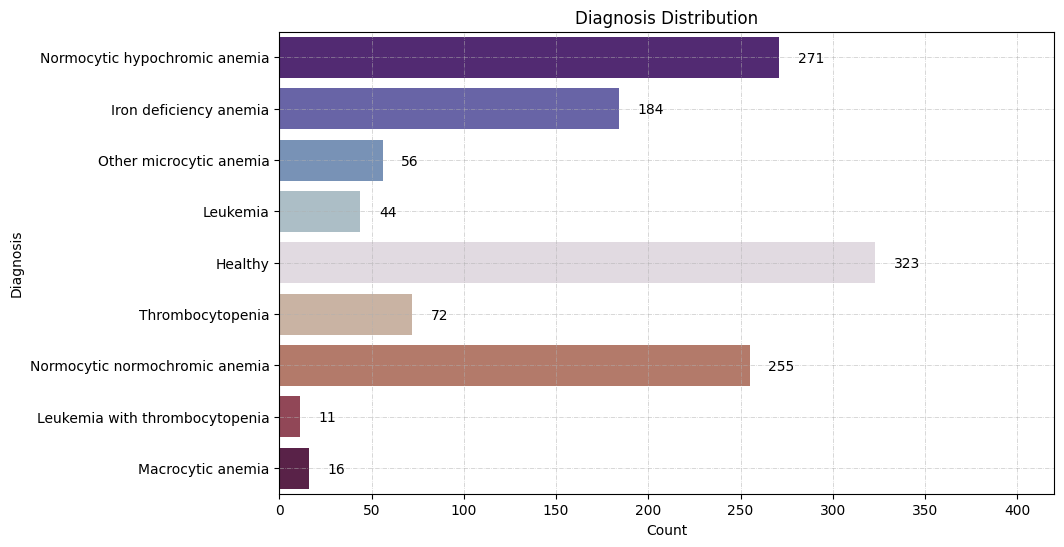

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='Diagnosis', data=cbc_df, palette='twilight_shifted')
ax.set_title('Diagnosis Distribution')
ax.set_xlabel('Count')
ax.set_ylabel('Diagnosis')
ax.grid(True, which ='both', linestyle='-.', linewidth=0.5, alpha = 0.7 )
plt.xlim(0, 420)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_width()), (p.get_width()+10, p.get_y()+0.5))
plt.show()


## Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features using LabelEncoder
le = LabelEncoder()
cbc_df['Diagnosis'] = le.fit_transform(cbc_df['Diagnosis'])

In [ ]:
cbc_df

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.00,43.200,50.100,4.30000,5.00000,2.77,7.3,24.2000,87.7,26.3,30.1,189.0,12.500000,0.17000,5
1,10.00,42.400,52.300,4.20000,5.30000,2.84,7.3,25.0000,88.2,25.7,20.2,180.0,12.500000,0.16000,5
2,7.20,30.700,60.700,2.20000,4.40000,3.97,9.0,30.5000,77.0,22.6,29.5,148.0,14.300000,0.14000,1
3,6.00,30.200,63.500,1.80000,3.80000,4.22,3.8,32.8000,77.9,23.2,29.8,143.0,11.300000,0.12000,1
4,4.20,39.100,53.700,1.60000,2.30000,3.93,0.4,316.0000,80.6,23.9,29.7,236.0,12.800000,0.22000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028,0
1277,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028,0
1278,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028,0
1279,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028,0


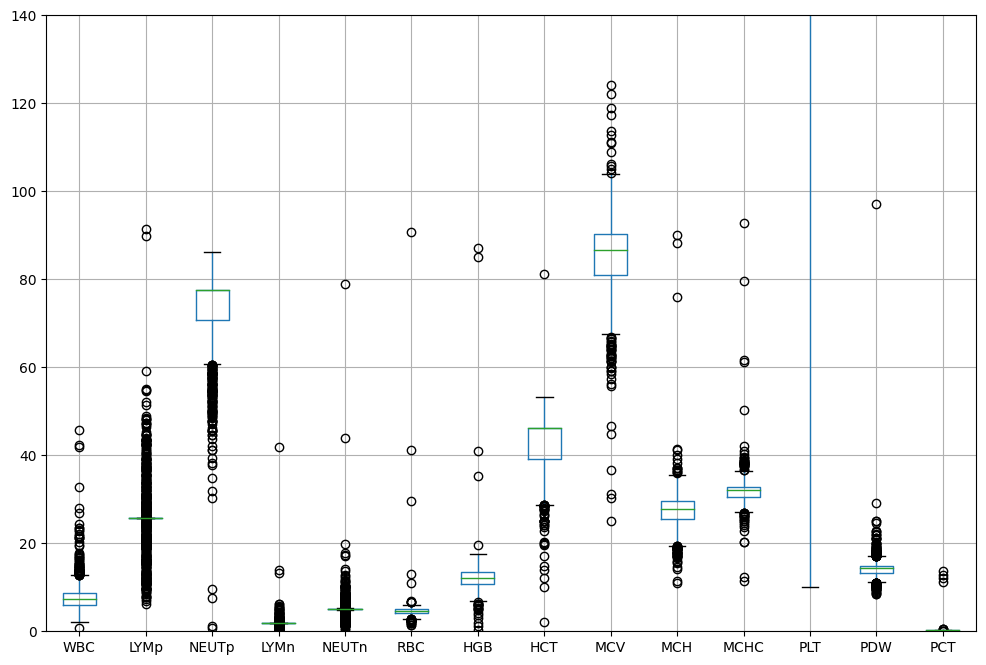

In [ ]:
# outliers
cbc_df.drop(['Diagnosis'], axis = 1).boxplot(figsize=(12,8))
plt.ylim(0,140)
plt.show()

In [ ]:
# from scipy.stats import zscore
zscore_df = stats.zscore(cbc_df)
abs_z = np.abs(zscore(cbc_df))


In [ ]:
# # Extreme values ​​tend to have z-scores outside the range of 3 standard deviations
# Dataset without outliers
filtered_entries = (abs_z < 3).all(axis=1)
filtered_df = cbc_df[filtered_entries]
filtered_df

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.00,43.200,50.100,4.30000,5.00000,2.77,7.3,24.2000,87.7,26.3,30.1,189.0,12.500000,0.17000,5
2,7.20,30.700,60.700,2.20000,4.40000,3.97,9.0,30.5000,77.0,22.6,29.5,148.0,14.300000,0.14000,1
3,6.00,30.200,63.500,1.80000,3.80000,4.22,3.8,32.8000,77.9,23.2,29.8,143.0,11.300000,0.12000,1
6,16.70,19.100,68.200,3.20000,11.40000,5.15,14.2,44.8000,87.1,27.5,31.6,151.0,12.800000,0.14000,2
7,9.30,27.400,64.000,2.60000,5.90000,4.39,12.0,37.9000,86.4,27.3,31.6,194.0,15.900000,0.19000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,4.40,25.845,77.511,1.88076,5.14094,4.86,13.5,46.1526,80.7,27.7,34.4,180.0,14.312512,0.26028,0
1277,5.60,25.845,77.511,1.88076,5.14094,4.85,15.0,46.1526,91.7,31.0,33.8,215.0,14.312512,0.26028,0
1278,9.20,25.845,77.511,1.88076,5.14094,4.47,13.1,46.1526,88.7,29.3,33.0,329.0,14.312512,0.26028,0
1279,6.48,25.845,77.511,1.88076,5.14094,4.75,13.2,46.1526,86.7,27.9,32.1,174.0,14.312512,0.26028,0


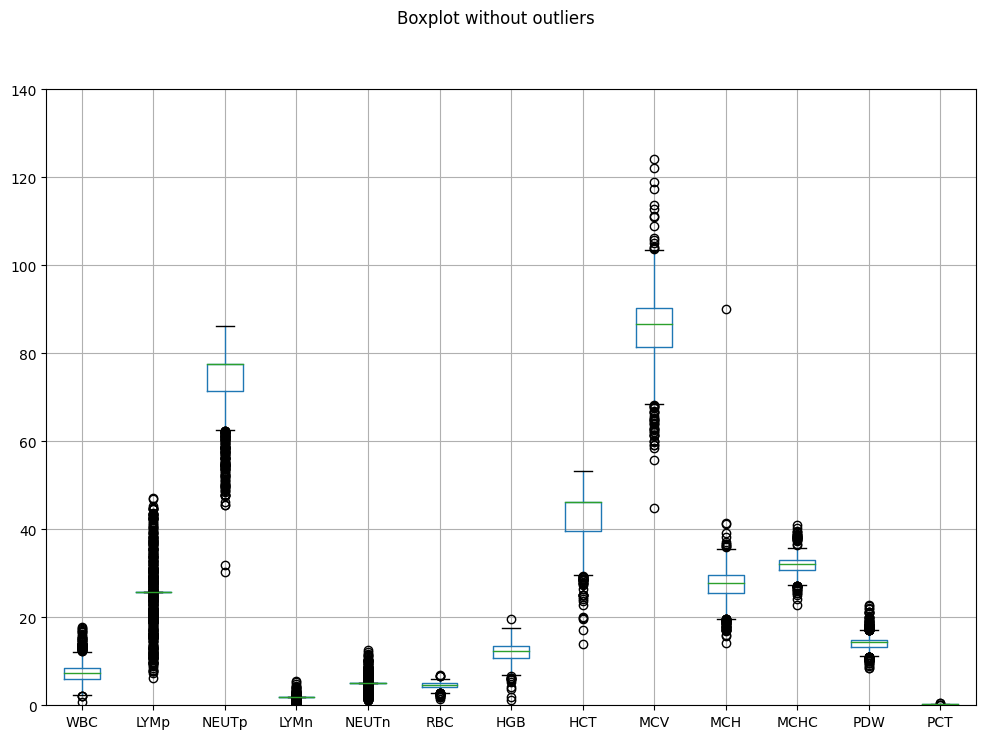

In [ ]:
filtered_df.drop(['PLT', 'Diagnosis'], axis = 1).boxplot(figsize=(12,8))
plt.ylim(0,140)
plt.suptitle('Boxplot without outliers')
plt.show()

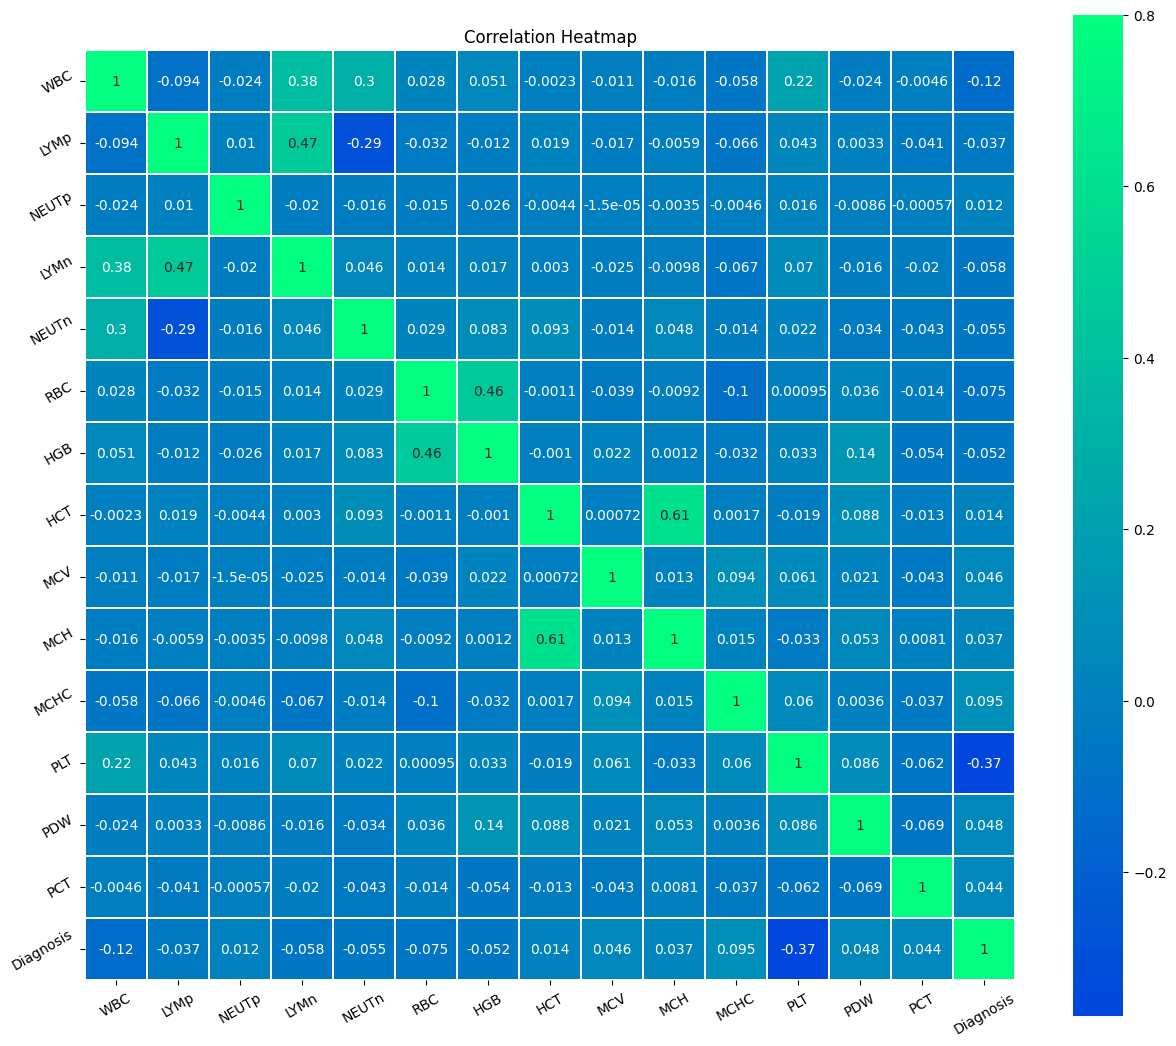

In [ ]:
## correlation
corr = cbc_df.corr()
plt.figure(figsize=(15, 13))
sns.heatmap(corr,  vmax = .8, linewidths=0.1,
            square=True, annot=True, cmap='winter',
            center=0)
plt.title('Correlation Heatmap')
plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.show()

In [ ]:
# split data
X = cbc_df.drop('Diagnosis', axis = 1)
y = cbc_df['Diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(cbc_df.drop(['Diagnosis'], axis=1), cbc_df['Diagnosis'], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Install lazypredict
!pip install lazypredict
from IPython.display import clear_output
try:
  !pip install lazypredict
except:
  print("error installing some libraries")
finally:
  clear_output()
  print("Success! all libraries are installed")

Success! all libraries are installed


In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
# Define high memory classifiers to avoid memory issues
highmem_classifiers = ["LabelSpreading","LabelPropagation","BernoulliNB",'SVC',"NearestCentroid","NuSVC","KNeighborsClassifier", "ElasticNetClassifier", "GradientBoostingClassifier", "HistGradientBoostingClassifier"]
classifiers = [c for c in lazypredict.Supervised.CLASSIFIERS if c[0] not in highmem_classifiers]

# Run LazyPredict to find the best performing classifier
clf = LazyClassifier(classifiers=classifiers,verbose=0,ignore_warnings=True)

models,predictions = clf.fit(X_train,X_test,y_train,y_test)
models

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


 91%|█████████ | 20/22 [00:05<00:00,  6.89it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000395 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1513
[LightGBM] [Info] Number of data points in the train set: 985, number of used features: 14
[LightGBM] [Info] Start training from score -1.324297
[LightGBM] [Info] Start training from score -1.909035
[LightGBM] [Info] Start training from score -3.281724
[LightGBM] [Info] Start training from score -4.946731
[LightGBM] [Info] Start training from score -4.327692
[LightGBM] [Info] Start training from score -1.508147
[LightGBM] [Info] Start training from score -1.584374
[LightGBM] [Info] Start training from score -3.042494
[LightGBM] [Info] Start training from score -2.922350
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

100%|██████████| 22/22 [00:07<00:00,  2.81it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,1.00,1.00,None,1.00,0.12
DecisionTreeClassifier,1.00,1.00,None,1.00,0.07
XGBClassifier,0.99,0.99,None,0.99,0.88
RandomForestClassifier,0.99,0.99,None,0.99,0.51
LGBMClassifier,0.99,0.97,None,0.99,1.55
ExtraTreesClassifier,0.89,0.82,None,0.89,0.57
GaussianNB,0.63,0.66,None,0.56,0.05
ExtraTreeClassifier,0.74,0.63,None,0.74,0.02
LogisticRegression,0.76,0.53,None,0.74,0.11


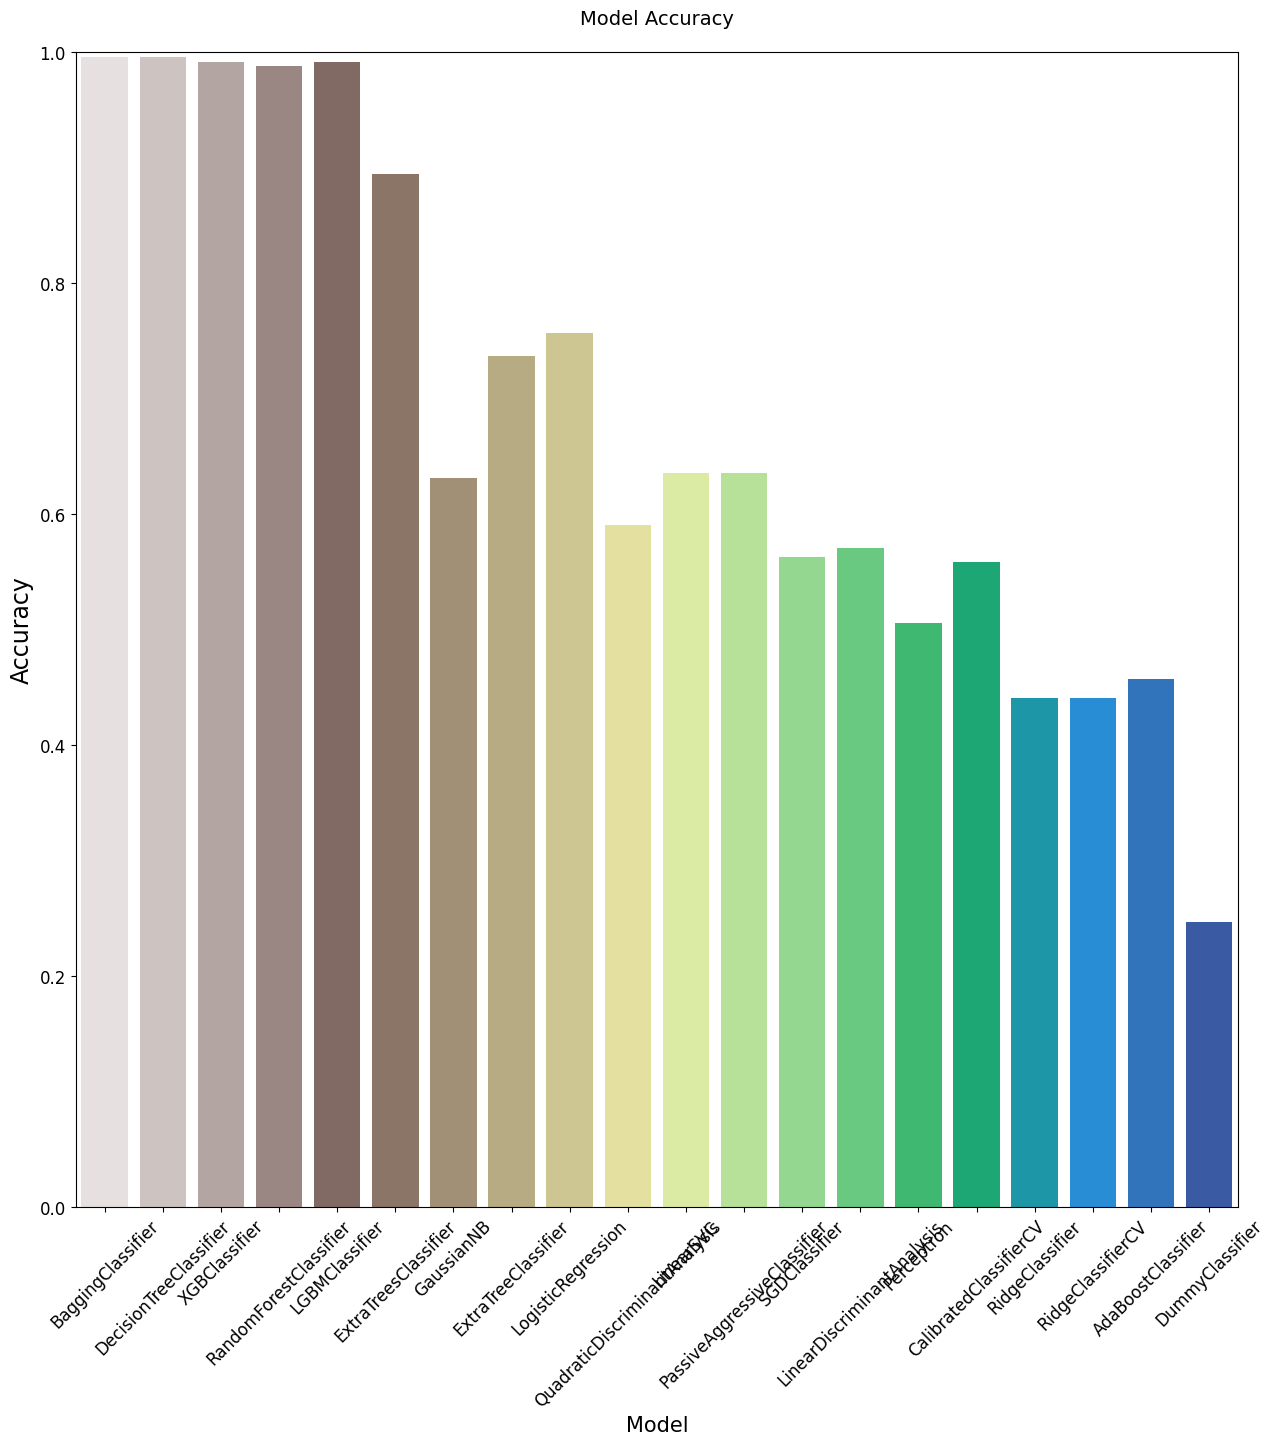

In [ ]:
plt.figure(figsize = (15, 15))

sns.barplot(x = 'Model', y = 'Accuracy', data = models, palette='terrain_r',saturation=0.7, ci=None)
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Model', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 17)
plt.title('Model Accuracy', fontsize=14, pad=20)
plt.ylim(0, 1)
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
X_train_s,X_test_s,y_train_s,y_test_s = train_test_split(X_smote,y_smote,test_size=0.15,random_state=43)

In [ ]:
models_s,predicton_s = clf.fit(X_train_s,X_test_s,y_train_s,y_test_s)
models_s

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


 91%|█████████ | 20/22 [00:13<00:00,  3.43it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000723 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3461
[LightGBM] [Info] Number of data points in the train set: 2470, number of used features: 14
[LightGBM] [Info] Start training from score -2.173619
[LightGBM] [Info] Start training from score -2.198845
[LightGBM] [Info] Start training from score -2.173619
[LightGBM] [Info] Start training from score -2.180762
[LightGBM] [Info] Start training from score -2.286520
[LightGBM] [Info] Start training from score -2.180762
[LightGBM] [Info] Start training from score -2.162999
[LightGBM] [Info] Start training from score -2.217262
[LightGBM] [Info] Start training from score -2.206171
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

100%|██████████| 22/22 [00:21<00:00,  1.01it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,1.00,0.99,None,1.00,3.03
DecisionTreeClassifier,1.00,0.99,None,1.00,0.08
RandomForestClassifier,1.00,0.99,None,1.00,1.19
BaggingClassifier,0.99,0.99,None,0.99,0.34
XGBClassifier,0.99,0.99,None,0.99,5.03
ExtraTreesClassifier,0.98,0.97,None,0.98,0.56
ExtraTreeClassifier,0.90,0.89,None,0.90,0.03
LogisticRegression,0.89,0.88,None,0.89,0.42
CalibratedClassifierCV,0.78,0.76,None,0.76,8.13


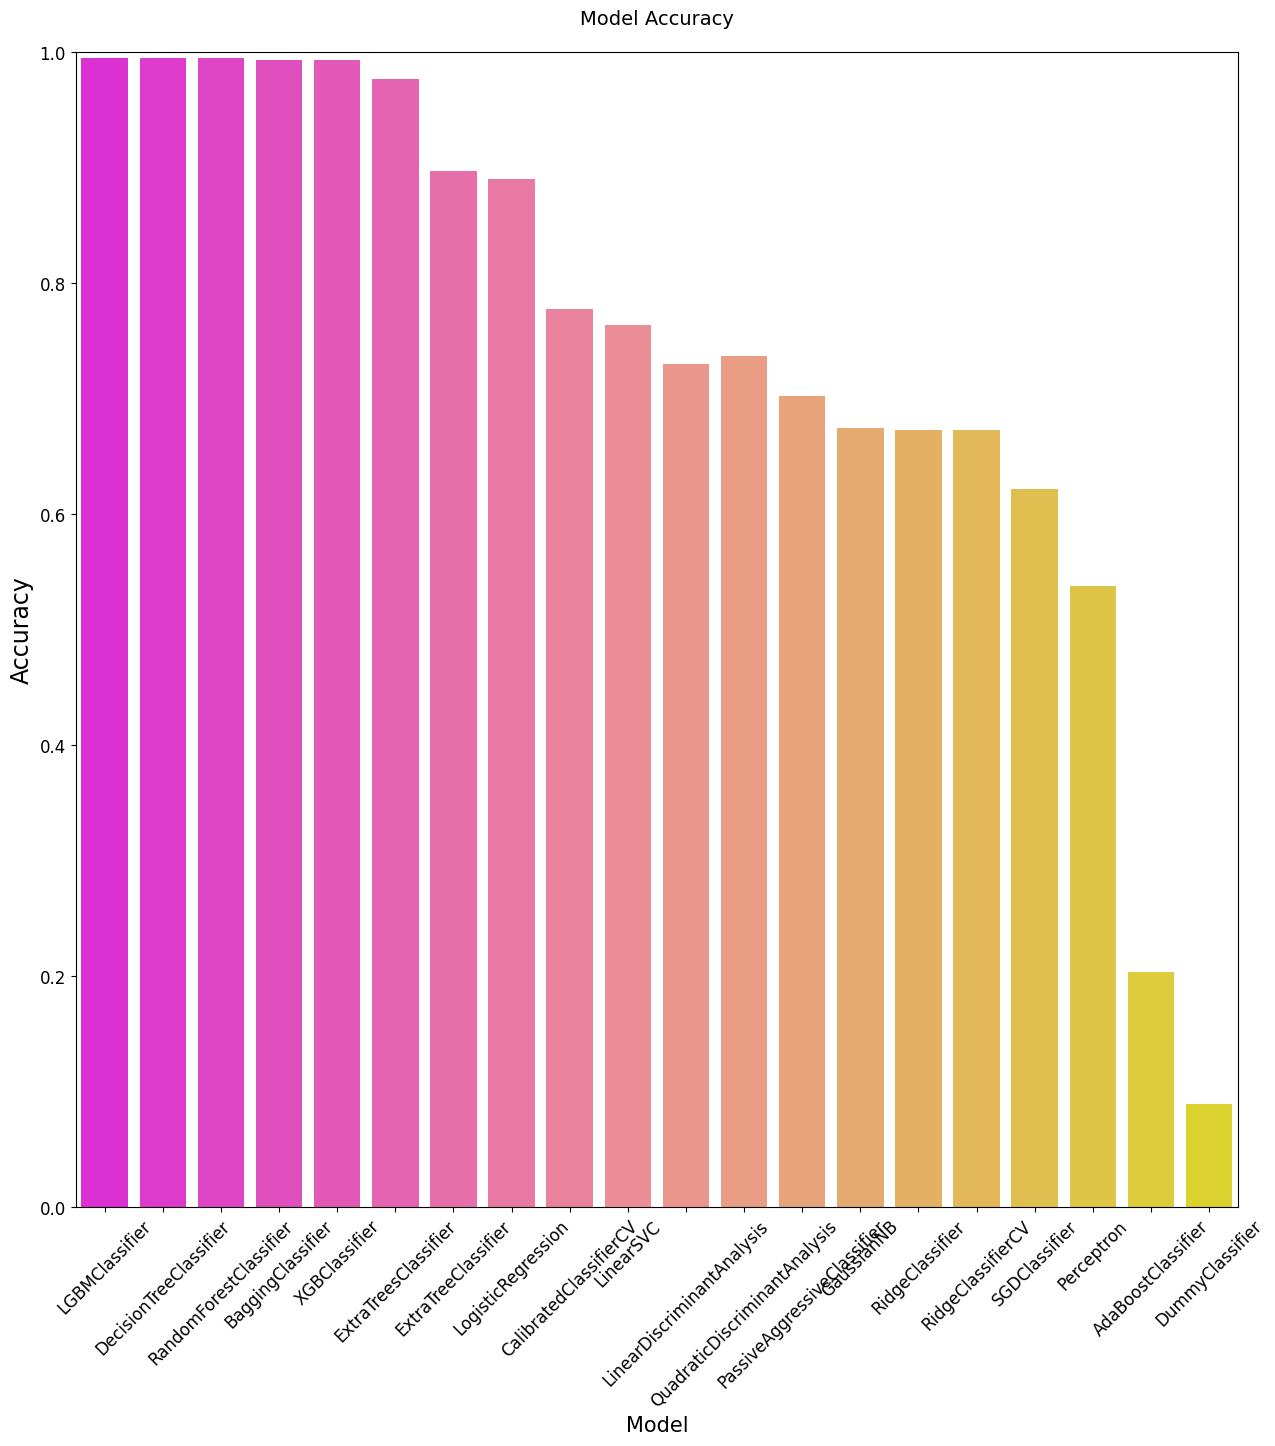

In [ ]:
plt.figure(figsize = (15, 15))

sns.barplot(x = 'Model', y = 'Accuracy', data = models_s, palette='spring',saturation=0.7, ci=None)
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('Model', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 17)
plt.title('Model Accuracy', fontsize=14, pad=20)
plt.ylim(0, 1)
plt.show()